In [48]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# data science
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_classification

# fun ones
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

seed = 0

In [49]:
df1 = pd.read_csv("../data_cleaning/data/ml_clean_homicide_data.csv", encoding = 'latin1')
df1

,uid,disposition,victim_sex,victim_race,victim_age,age_range,reported_date,reported_year,reported_month,reported_weekday,season,city,state,lat,lon,LOCATION,POPULATION
0,Alb-000001,No Arrest,Male,Hispanic,78,65+,2010-05-04,2010,May,Tuesday,Spring,Albuquerque,NM,35.095788,-106.538555,"Albuquerque, NM",545852
1,Alb-000002,Arrest Made,Male,Hispanic,17,0-17,2010-02-16,2010,February,Tuesday,Winter,Albuquerque,NM,35.056810,-106.715321,"Albuquerque, NM",545852
2,Alb-000003,No Arrest,Female,White,15,0-17,2010-06-01,2010,June,Tuesday,Summer,Albuquerque,NM,35.086092,-106.695568,"Albuquerque, NM",545852
3,Alb-000004,Arrest Made,Male,Hispanic,32,30-44,2010-01-01,2010,January,Friday,Winter,Albuquerque,NM,35.078493,-106.556094,"Albuquerque, NM",545852
4,Alb-000005,No Arrest,Female,White,72,65+,2010-01-02,2010,January,Saturday,Winter,Albuquerque,NM,35.130357,-106.580986,"Albuquerque, NM",545852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47473,Was-001380,Arrest Made,Male,Black,29,18-29,2016-09-08,2016,September,Thursday,Fall,Washington,DC,38.828704,-77.002075,"Washington, DC",687576
47474,Was-001381,No Arrest,Male,Black,19,18-29,2016-09-13,2016,September,Tuesday,Fall,Washington,DC,38.822852,-77.001725,"Washington, DC",687576
47475,Was-001382,No Arrest,Male,Black,23,18-29,2016-11-14,2016,November,Monday,Fall,Washington,DC,38.828025,-77.002511,"Washington, DC",687576
47476,Was-001383,No Arrest,Male,Black,24,18-29,2016-11-30,2016,November,Wednesday,Fall,Washington,DC,38.820476,-77.008640,"Washington, DC",687576


In [50]:
# Select and retain only the desired columns
final_columns_to_keep = ['victim_age','victim_sex','victim_race', 'reported_date', 'reported_year','reported_month', 'reported_weekday', 'season', 'city', 'state', 'POPULATION', 'disposition']
df = df1[final_columns_to_keep]
df.head()

,victim_age,victim_sex,victim_race,reported_date,reported_year,reported_month,reported_weekday,season,city,state,POPULATION,disposition
0,78,Male,Hispanic,2010-05-04,2010,May,Tuesday,Spring,Albuquerque,NM,545852,No Arrest
1,17,Male,Hispanic,2010-02-16,2010,February,Tuesday,Winter,Albuquerque,NM,545852,Arrest Made
2,15,Female,White,2010-06-01,2010,June,Tuesday,Summer,Albuquerque,NM,545852,No Arrest
3,32,Male,Hispanic,2010-01-01,2010,January,Friday,Winter,Albuquerque,NM,545852,Arrest Made
4,72,Female,White,2010-01-02,2010,January,Saturday,Winter,Albuquerque,NM,545852,No Arrest


In [51]:
df["disposition"] = df["disposition"].apply(lambda x: 1 if x == "Arrest Made" else 0)
df

C:\Users\Home\AppData\Local\Temp\ipykernel_23412\3285981948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["disposition"] = df["disposition"].apply(lambda x: 1 if x == "Arrest Made" else 0)


,victim_age,victim_sex,victim_race,reported_date,reported_year,reported_month,reported_weekday,season,city,state,POPULATION,disposition
0,78,Male,Hispanic,2010-05-04,2010,May,Tuesday,Spring,Albuquerque,NM,545852,0
1,17,Male,Hispanic,2010-02-16,2010,February,Tuesday,Winter,Albuquerque,NM,545852,1
2,15,Female,White,2010-06-01,2010,June,Tuesday,Summer,Albuquerque,NM,545852,0
3,32,Male,Hispanic,2010-01-01,2010,January,Friday,Winter,Albuquerque,NM,545852,1
4,72,Female,White,2010-01-02,2010,January,Saturday,Winter,Albuquerque,NM,545852,0
...,...,...,...,...,...,...,...,...,...,...,...,...
47473,29,Male,Black,2016-09-08,2016,September,Thursday,Fall,Washington,DC,687576,1
47474,19,Male,Black,2016-09-13,2016,September,Tuesday,Fall,Washington,DC,687576,0
47475,23,Male,Black,2016-11-14,2016,November,Monday,Fall,Washington,DC,687576,0
47476,24,Male,Black,2016-11-30,2016,November,Wednesday,Fall,Washington,DC,687576,0


In [52]:
# Drop reported date column
drop_reporteddate = df.drop('reported_date', axis = 1, inplace=True)

df

C:\Users\Home\AppData\Local\Temp\ipykernel_23412\1097537222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_reporteddate = df.drop('reported_date', axis = 1, inplace=True)


,victim_age,victim_sex,victim_race,reported_year,reported_month,reported_weekday,season,city,state,POPULATION,disposition
0,78,Male,Hispanic,2010,May,Tuesday,Spring,Albuquerque,NM,545852,0
1,17,Male,Hispanic,2010,February,Tuesday,Winter,Albuquerque,NM,545852,1
2,15,Female,White,2010,June,Tuesday,Summer,Albuquerque,NM,545852,0
3,32,Male,Hispanic,2010,January,Friday,Winter,Albuquerque,NM,545852,1
4,72,Female,White,2010,January,Saturday,Winter,Albuquerque,NM,545852,0
...,...,...,...,...,...,...,...,...,...,...,...
47473,29,Male,Black,2016,September,Thursday,Fall,Washington,DC,687576,1
47474,19,Male,Black,2016,September,Tuesday,Fall,Washington,DC,687576,0
47475,23,Male,Black,2016,November,Monday,Fall,Washington,DC,687576,0
47476,24,Male,Black,2016,November,Wednesday,Fall,Washington,DC,687576,0


In [53]:
df.columns


Index(['victim_age', 'victim_sex', 'victim_race', 'reported_year',
       'reported_month', 'reported_weekday', 'season', 'city', 'state',
       'POPULATION', 'disposition'],
      dtype='object')

In [54]:
#replace white space with underline in columns

df.columns = df.columns.str.replace(' ', '_')


In [55]:
#count values in each categorical columns (not numeric columns)

cat_cols = df.select_dtypes(exclude=[np.number]).columns

# value counts
for col in cat_cols:
    print(df[col].nunique())
    print(df[col].value_counts())
    print()

2
Male      40387
Female     7091
Name: victim_sex, dtype: int64

5
Black       33062
Hispanic     6817
White        6259
Asian         676
Other         664
Name: victim_race, dtype: int64

12
July         4624
August       4360
June         4273
May          4210
September    4131
October      4060
December     3890
November     3886
April        3779
January      3682
March        3622
February     2961
Name: reported_month, dtype: int64

7
Sunday       7850
Saturday     7619
Monday       6853
Friday       6446
Tuesday      6331
Wednesday    6256
Thursday     6123
Name: reported_weekday, dtype: int64

4
Summer    13257
Fall      12077
Spring    11611
Winter    10533
Name: season, dtype: int64

47
Chicago           5523
Philadelphia      3036
Houston           2908
Baltimore         2827
Detroit           2496
Los Angeles       2196
St. Louis         1661
Memphis           1510
New Orleans       1394
Indianapolis      1321
Washington        1308
Las Vegas         1299
Jacksonville   

In [56]:
#one hot coding the categorical columns
df2 = pd.get_dummies(df)
df2

,victim_age,reported_year,POPULATION,disposition,victim_sex_Female,victim_sex_Male,victim_race_Asian,victim_race_Black,victim_race_Hispanic,victim_race_Other,...,state_NM,state_NV,state_NY,state_OH,state_OK,state_PA,state_TN,state_TX,state_VA,state_WI
0,78,2010,545852,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,17,2010,545852,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,15,2010,545852,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,32,2010,545852,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,72,2010,545852,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47473,29,2016,687576,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
47474,19,2016,687576,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
47475,23,2016,687576,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
47476,24,2016,687576,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#check the datatype for df
df2.dtypes

victim_age           int64
reported_year        int64
POPULATION           int64
disposition          int64
victim_sex_Female    uint8
                     ...  
state_PA             uint8
state_TN             uint8
state_TX             uint8
state_VA             uint8
state_WI             uint8
Length: 108, dtype: object

In [58]:
# Create our train/test set
X = df2.drop(columns=["disposition"])
y = df2["disposition"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=seed, 
                                                    stratify=y, test_size = .20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(37982, 107) (37982,)
(9496, 107) (9496,)


In [59]:
def doMLClassification(model, X_train, y_train, X_test, y_test):
    # fit the model
    model.fit(X_train, y_train)

    # predict the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)[:,1]

    # make some pretty graphs
    print("TRAINING SET METRICS")
    print(confusion_matrix(y_train, train_preds))
    print(classification_report(y_train, train_preds))
    print("TESTING SET METRICS")
    print(confusion_matrix(y_test, test_preds))
    print(classification_report(y_test, test_preds))

    # ROC Curve
    auc = roc_auc_score(y_test, test_proba)
    fpr, tpr, thresholds = roc_curve(y_test, test_proba)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(F"AUC: {auc}")
    plt.show()

TRAINING SET METRICS
[[12444  6962]
 [ 7142 11434]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64     19406
           1       0.62      0.62      0.62     18576

    accuracy                           0.63     37982
   macro avg       0.63      0.63      0.63     37982
weighted avg       0.63      0.63      0.63     37982

TESTING SET METRICS
[[3078 1774]
 [1828 2816]]
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      4852
           1       0.61      0.61      0.61      4644

    accuracy                           0.62      9496
   macro avg       0.62      0.62      0.62      9496
weighted avg       0.62      0.62      0.62      9496



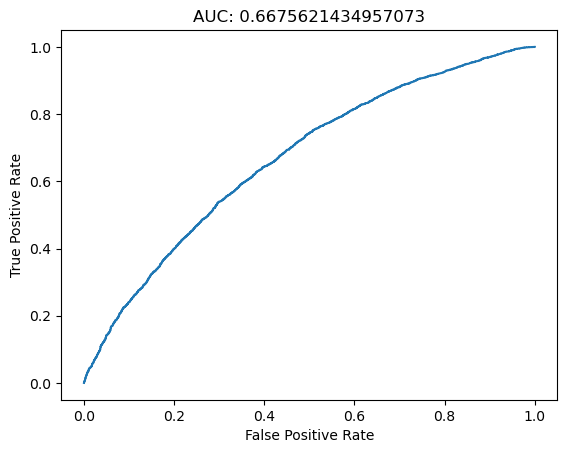

In [60]:
#init the model
ada = AdaBoostClassifier(random_state=42, n_estimators = 200)
doMLClassification(ada, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[12806  6600]
 [ 7281 11295]]
              precision    recall  f1-score   support

           0       0.64      0.66      0.65     19406
           1       0.63      0.61      0.62     18576

    accuracy                           0.63     37982
   macro avg       0.63      0.63      0.63     37982
weighted avg       0.63      0.63      0.63     37982

TESTING SET METRICS
[[3179 1673]
 [1908 2736]]
              precision    recall  f1-score   support

           0       0.62      0.66      0.64      4852
           1       0.62      0.59      0.60      4644

    accuracy                           0.62      9496
   macro avg       0.62      0.62      0.62      9496
weighted avg       0.62      0.62      0.62      9496



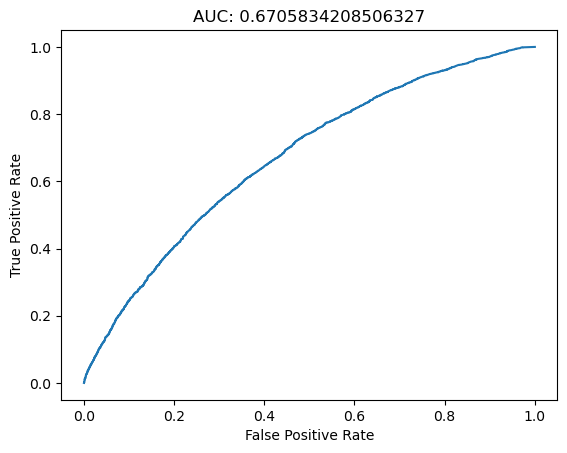

In [61]:
#init the model 
gb = GradientBoostingClassifier(random_state=42)
doMLClassification(gb, X_train, y_train, X_test, y_test)

In [62]:

#feature importances of ada model 

sorted(list(zip(ada.feature_importances_, X.columns)), reverse=True)

[(0.43, 'POPULATION'),
 (0.185, 'victim_age'),
 (0.06, 'reported_year'),
 (0.01, 'victim_race_White'),
 (0.01, 'state_VA'),
 (0.01, 'season_Fall'),
 (0.01, 'reported_month_December'),
 (0.01, 'city_Los Angeles'),
 (0.01, 'city_Baltimore'),
 (0.005, 'victim_sex_Female'),
 (0.005, 'victim_race_Asian'),
 (0.005, 'state_WI'),
 (0.005, 'state_TX'),
 (0.005, 'state_TN'),
 (0.005, 'state_NM'),
 (0.005, 'state_NC'),
 (0.005, 'state_MD'),
 (0.005, 'state_LA'),
 (0.005, 'state_IL'),
 (0.005, 'state_GA'),
 (0.005, 'state_FL'),
 (0.005, 'state_CO'),
 (0.005, 'state_CA'),
 (0.005, 'state_AL'),
 (0.005, 'season_Summer'),
 (0.005, 'reported_weekday_Wednesday'),
 (0.005, 'reported_weekday_Tuesday'),
 (0.005, 'reported_weekday_Monday'),
 (0.005, 'reported_month_November'),
 (0.005, 'reported_month_May'),
 (0.005, 'reported_month_July'),
 (0.005, 'reported_month_February'),
 (0.005, 'reported_month_August'),
 (0.005, 'reported_month_April'),
 (0.005, 'city_Tulsa'),
 (0.005, 'city_Tampa'),
 (0.005, 'city

In [63]:
#calculate the accuracy score of the ada model way #1

y_pred = gb.predict(X_test)
print(gb.score(X_test, y_test))

0.622893850042123


In [64]:
#way #2 to calculate the accuracy score

accuracy_score(y_pred, y_test)

0.622893850042123

In [65]:
y_pred, y_test

(array([1, 1, 1, ..., 0, 1, 1], dtype=int64),
 20106    0
 5564     0
 5266     1
 31254    1
 1428     0
         ..
 16509    1
 27837    1
 35264    0
 6449     0
 39828    0
 Name: disposition, Length: 9496, dtype: int64)

In [66]:
#max_features: number of features that will use to construct the model 
#n estimators = trees that we will use to construct the prediction model 
#search for optimal parameters (gridsearch)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV




# Create an instance of AdaBoostClassifier
gb = GradientBoostingClassifier(random_state=42)


# Define the hyperparameters and their range
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_result = grid_search.fit(X, y)

# Print the best parameters and the corresponding score
print("Best Parameters: ", grid_result.best_params_)
print("Best Score: ", grid_result.best_score_)


Hyper Parameter Tuning using GridSearch CV

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

max_features_range = ['auto', 'sqrt', 'log2', None, 0.2, 0.5, 0.8]
n_estimators_range = np.arange(10, 220, 10)

param_grid = {
    'max_features': max_features_range,
    'n_estimators': n_estimators_range
}

gb= GradientBoostingClassifier(random_state = 42)

grid = GridSearchCV(gb, param_grid, scoring = 'accuracy', cv=5)
grid

#Note: LGBM has feature fraction parameter, it is a hyperparameter that control the fraction of features to consider for each tree, 
# and it is typically between 0-1. This range allows us to try different fractions of features in our model. The array for 
#feature_fraction_range is [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]. LGBM does not have max_features like other tree 
#based models. 

In [ ]:
grid_result = grid_search.fit(X, y)

# Print the best parameters and the corresponding score
print("Best Parameters: ", grid_result.best_params_)
print("Best Score: ", grid_result.best_score_)

In [ ]:

# Extract the parameters and mean test scores
grid_results = pd.DataFrame({
    "feature_fraction": grid.cv_results_["param_feature_fraction"],
    "n_estimators": grid.cv_results_["param_n_estimators"],
    "Accuracy": grid.cv_results_["mean_test_score"]
})

# Rename columns
grid_results.columns = ["feature_fraction", "n_estimators", "Accuracy"]

# Display the results
print(grid_results)


In [ ]:
#GridSearchCV 

grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]), 
                          pd.DataFrame(grid.cv_results_["mean_test_score"])], 
                         axis=1)
grid_results.columns = ["feature_fraction", "n_estimators", "Accuracy"]
grid_results


In [ ]:
grid_contour = grid_results.groupby(["feature_fraction", "n_estimators"]).mean()
grid_contour


In [515]:
#data is reshaped by pivoting the data into an m by n matrix where rows and columns correspond to the "feature_fractions" and "n_estimators"

grid_reset = grid_contour.reset_index()
grid_reset.columns = ['feature_fraction', 'n_estimators', 'Accuracy']
grid_pivot = grid_reset.pivot("feature_fraction", 'n_estimators', 'Accuracy')
grid_pivot


n_estimators,10,20,30,40,50,60,70,80,90,100,...,120,130,140,150,160,170,180,190,200,210
feature_fraction,,,,,,,,,,,,,,,,,,,,,
0.1,0.617582,0.619083,0.622400,0.624164,0.625217,0.627297,0.627034,0.627718,0.628613,0.628640,...,0.628666,0.628324,0.628613,0.629351,0.629403,0.630404,0.630957,0.630720,0.630614,0.630614
0.2,0.619214,0.625322,0.626981,0.626007,0.627771,0.628508,0.629667,0.630878,0.630035,0.629298,...,0.629614,0.629298,0.629719,0.629351,0.629008,0.629219,0.628140,0.628271,0.628377,0.628219
0.3,0.621005,0.625717,0.627850,0.627929,0.627876,0.629377,0.629719,0.629719,0.629430,0.628693,...,0.628693,0.628482,0.628771,0.628824,0.628640,0.627560,0.626928,0.627402,0.626955,0.626902
0.4,0.623506,0.628245,0.628745,0.628666,0.630167,0.630272,0.629351,0.629061,0.628692,0.627929,...,0.629614,0.629561,0.629667,0.628482,0.627771,0.627824,0.627587,0.627350,0.626718,0.626955
0.5,0.625954,0.627297,0.627771,0.628219,0.629140,0.629061,0.628929,0.627955,0.628587,0.628429,...,0.627455,0.628271,0.627271,0.627402,0.627982,0.627745,0.627639,0.627534,0.627350,0.627639
0.6,0.625586,0.626902,0.628008,0.627903,0.628403,0.627718,0.626876,0.627218,0.627060,0.627666,...,0.627429,0.627060,0.627166,0.627008,0.626139,0.625560,0.625717,0.625665,0.624928,0.625349
0.7,0.623690,0.625086,0.629298,0.628377,0.626850,0.626744,0.627271,0.628324,0.627771,0.627508,...,0.627850,0.627824,0.627060,0.626560,0.626481,0.626692,0.626455,0.626218,0.626033,0.625902
0.8,0.623506,0.626692,0.627534,0.627639,0.627455,0.627534,0.627034,0.626533,0.626928,0.627060,...,0.627429,0.627376,0.627323,0.627034,0.627692,0.627271,0.627850,0.627455,0.626929,0.626376
0.9,0.623085,0.625796,0.626613,0.629087,0.629035,0.629377,0.628324,0.627850,0.627402,0.627718,...,0.627165,0.626402,0.626876,0.626376,0.626376,0.626376,0.625586,0.625296,0.625007,0.624770


In [516]:
##assign the pivot table above to x, y and z variables 
x = grid_pivot.columns.to_numpy()
y = grid_pivot.index.to_numpy()
z = grid_pivot.to_numpy()


In [517]:
import plotly.graph_objects as go
layout = go.Layout(
            xaxis = go.layout.XAxis(
                title = go.layout.xaxis.Title(
                text = "feature_fraction")
            ), 
            yaxis = go.layout.YAxis(
                title = go.layout.yaxis.Title(
            text = "n_estimators")
            ))
fig = go.Figure(data = [go.Contour(z = z, x =x, y =y)], layout = layout)
fig.update_layout(title="Hyperparameter tuning", autosize=False, width=500, height=500, margin=dict(l=65, r=50, b=65, t=90))


fig.show()

In [518]:
#3D Surface Plot 

fig = go.Figure(data = [go.Surface(z = z , y = y, x = x )], layout = layout)
fig.update_layout (title = "Hyperparameter tuning", 
                  scene = dict(
                  xaxis_title = 'feature_fraction', 
                  yaxis_title = 'max_features', 
                  zaxis_title = "Accuracy"), 
                  autosize = False, 
                  width = 1000, height = 1000, 
                  margin = dict (l = 65, r = 50, b = 65, t = 90))
fig.show()

In [519]:
#RandomizedSearchCV

In [587]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Initialize AdaBoostClassifier with a large number of estimators
ada = AdaBoostClassifier(n_estimators=300, random_state=42)

# Train the model on the training data
ada.fit(X_train, y_train)

# Monitor performance on the validation set
val_predictions = ada.predict(X_test)
val_accuracy = accuracy_score(y_test, val_predictions)

# Initialize variables for early stopping
best_val_accuracy = val_accuracy
best_estimators = 300
tolerance = 10  # Number of consecutive iterations with no improvement to tolerate

for i in range(300):
    # Train for one more iteration
    ada.n_estimators += 1
    ada.fit(X_train, y_train)
    
    # Monitor performance on the validation set
    val_predictions = ada.predict(X_test)
    val_accuracy = accuracy_score(y_test, val_predictions)
    
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_estimators = ada.n_estimators
        tolerance = 10  # Reset tolerance if there's improvement
    else:
        tolerance -= 1
    
    if tolerance == 0:
        break

# Use the best number of estimators
ada.n_estimators = best_estimators

# Final training
ada.fit(X_train, y_train)

# Make predictions on the test set
test_predictions = ada.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Best Number of Estimators: {best_estimators}")
print(f"Test Accuracy: {test_accuracy}")



KeyboardInterrupt



In [520]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [521]:
pipe = make_pipeline(CountVectorizer(), MultinomialNB())

In [522]:
lgbm.fit(X_train, y_train)
test_data_prediction = lgbm.predict(X_test)
accuracy = accuracy_score (y_test, test_data_prediction)
accuracy 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18576, number of negative: 19406
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 37982, number of used features: 107
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489074 -> initscore=-0.043712
[LightGBM] [Info] Start training from score -0.043712


0.6252106149957877

In [523]:
#cross validation test  

In [524]:
X

,victim_age,reported_year,POPULATION,victim_sex_Female,victim_sex_Male,victim_race_Asian,victim_race_Black,victim_race_Hispanic,victim_race_Other,victim_race_White,...,state_NM,state_NV,state_NY,state_OH,state_OK,state_PA,state_TN,state_TX,state_VA,state_WI
0,78,2010,545852,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,17,2010,545852,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,15,2010,545852,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,32,2010,545852,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,72,2010,545852,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47473,29,2016,687576,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47474,19,2016,687576,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47475,23,2016,687576,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47476,24,2016,687576,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [525]:
y

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [526]:
from sklearn.model_selection import cross_val_score

# 10 fold cv
scores = cross_val_score(lgbm, X_train, y_train, scoring='r2', cv=10)
scores

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16718, number of negative: 17465
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002519 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of data points in the train set: 34183, number of used features: 107
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489074 -> initscore=-0.043713
[LightGBM] [Info] Start training from score -0.043713
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16718, number of negative: 17465
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 564
[LightGBM]

array([-0.48004313, -0.45476126, -0.49622141, -0.51202657, -0.53099275,
       -0.47304052, -0.5257595 , -0.48150405, -0.47096703, -0.51943729])

In [527]:
print(np.mean(scores))

-0.4944753514995047


In [528]:
#printing the scores on test dataset 
# first : prediction 
from sklearn.model_selection import cross_val_predict 
pred = cross_val_predict(lgbm, X_test, y_test)
pred

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3715, number of negative: 3881
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 557
[LightGBM] [Info] Number of data points in the train set: 7596, number of used features: 107
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489073 -> initscore=-0.043714
[LightGBM] [Info] Start training from score -0.043714
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3716, number of negative: 3881
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 551
[LightGBM] [Inf

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [529]:
#10 fold CV on test data 
scores_test = cross_val_score (lgbm, X_test, y_test, cv = 10)
scores_test

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4180, number of negative: 4366
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000565 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 8546, number of used features: 107
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489118 -> initscore=-0.043536
[LightGBM] [Info] Start training from score -0.043536
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4180, number of negative: 4366
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 8546, number of used 

array([0.62631579, 0.59473684, 0.61157895, 0.61789474, 0.59684211,
       0.63368421, 0.60168599, 0.61854584, 0.62486828, 0.63540569])

In [530]:
# the average of the 10 folds 
print(np.mean(scores_test))

0.6161558427153236


In [531]:
lgbm = LGBMClassifier(n_estimators = 14, max_depth = 9, num_leaves = 31 ) 
lgbm.fit(X_train, y_train)
lgbm_train_preds = lgbm.predict(X_train) 
lgbm_val_predicts = lgbm.predict(X_test)
accuracy_score(lgbm_train_preds, y_train), accuracy_score(lgbm_val_predicts, y_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 18576, number of negative: 19406
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 37982, number of used features: 107
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489074 -> initscore=-0.043712
[LightGBM] [Info] Start training from score -0.043712
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth 

(0.6308251276920647, 0.6226832350463353)

In [532]:
lgbm_test_preds = lgbm.predict(X_test)
accuracy_score(lgbm_test_preds, y_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.6226832350463353

In [533]:
score1 = cross_val_score(lgbm, X_train, y_train, cv = 7)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 15922, number of negative: 16634
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of data points in the train set: 32556, number of used features: 107
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489065 -> initscore=-0.043747
[LightGBM] [Info] Start training from score -0.043747
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may

In [534]:
print(np.mean(score1))

0.6198725712179453
